### Exponential fit of ionic channel opening and closing

The channel opening and closing can be described by an exponential model. This can be derived from the binomial distribution, which describes the probability of an event (success) of happening a specific number of times. This distribution can be aproximated to a Poisson distribution when the number of sample is big and the probability of success is small. This distribution allows us to calculate the proability of $k$ events happening during a interval of time $t$

\begin{equation}
    p\left( \genfrac{}{}{0pt}{}{K events}{in \,t} \right) = \alpha t^k \times e^{-\alpha t}, 
\end{equation}

where alpha can be also described in terms of $\lambda$, which corresponds to the mean of the probability function

\begin{equation}
    \lambda = \alpha \times t.
\end{equation}

Which we can think as the mean $\alpha t$ of opening of the channel if we measure during a time $t$. In this case, the "success" event represents one transition, or one state change of the channel.If $k = 0$ during one period of time $t$, this means there were no transitions during this time, for example, if the channel was open, this means it did not closed during time $t$.

Probability Density Function (PDF) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\HOST001\AppData\Local\Temp\ipykernel_23844\2209694567.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(currentVal)<midVal:


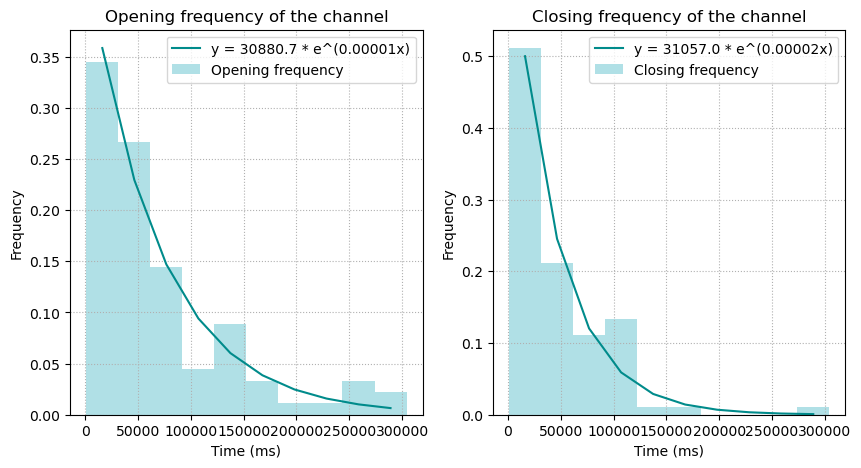

In [62]:
#FUNCIONNN COMPLETAAAAAA

def exponential(x,a,b):
    return a*b*np.exp(-b*x)

def FitChannelModel(DataFileName, PDF=False):
    uploaded_csv_filename = DataFileName
    data_frame = pd.read_csv(uploaded_csv_filename) # Read the uploaded CSV file using pandas
    data_array = data_frame.to_numpy() # Convert the DataFrame to a NumPy array

    #Generar lista de open y close a partir del data_array
    close=[]
    open=[]
    close_count=0
    open_count=0
    midVal=np.amax(data_array)+np.amin(data_array)/2
    #print(midVal)
    for currentVal in data_array:
        if float(currentVal)<midVal:
            open_count=open_count+1
            if close_count != 0:
                close.append(close_count)
                close_count=0
        else:
            close_count=close_count+1
            if open_count != 0:
                open.append(open_count)
                open_count=0

    States = [open,close]
    frOpenClose = []

    for Data in States:
        sizeData = len(Data)
        maxN = max(Data)
        minN = min(Data)
        binSize = (maxN - minN)/np.sqrt(sizeData)
        binsRange = [minN]
        ranges = minN
        #create list with the values of the list
        while ranges<maxN:
            ranges = ranges+binSize
            binsRange.append(ranges)

        frequencies = np.zeros(len(binsRange)-1) 
        time = []

        for i in list(range(0, len(binsRange)-1, 1)):
            time.append(binsRange[i]+binSize/2)
            for value in Data:
                if binsRange[i]<=value and value<binsRange[i+1]:
                    frequencies[i]=frequencies[i]+1
            
        total_fr=sum(frequencies) #to normalize the PDF
        if PDF: #cumplir si el usuario quiere normalizarlo
            frequencies=frequencies/total_fr
        else:
            None
        
        #Frequences in two elements of same array frOpenClose[0]= freqOpen,  frOpenClose[1]= freqClose 
        frOpenClose.append(frequencies)

    fitPopt=[]
    fitPerr=[]

    for freqState in frOpenClose:
        popt, pcov = curve_fit(exponential, np.asarray(time), np.asanyarray(freqState), p0=[800000,0.00001], bounds=([0,0],[np.inf,np.inf])) #con 1 arranca la busqueda
        perr = np.sqrt(np.diag(pcov))

        fitPopt.append(popt)
        fitPerr.append(perr)

    fig , ax = plt.subplots(1,2,figsize=(10,5))  #Graficacion

    equation_label1 = f'y = {fitPopt[0][0]:.1f} * e^({fitPopt[0][1]:.5f}x)'
    equation_label2 = f'y = {fitPopt[1][0]:.1f} * e^({fitPopt[1][1]:.5f}x)'

    ax[0].plot(np.asarray(time), exponential(np.asarray(time), fitPopt[0][0], fitPopt[0][1]), color="darkcyan", label=equation_label1)
    ax[0].bar(time,frOpenClose[0],color="powderblue",label=("Opening frequency"),width=int(time[1]-time[0])) 
    ax[0].set_title(f"Opening frequency of the channel")
    ax[0].set_ylabel("Frequency")
    ax[0].set_xlabel("Time (ms)")
    ax[0].grid(linestyle=':')
    ax[0].legend()

    ax[1].plot(np.asarray(time), exponential(np.asarray(time), fitPopt[1][0], fitPopt[1][1]), color="darkcyan", label=equation_label2)
    ax[1].bar(time,frOpenClose[1],color="powderblue",label=("Closing frequency"),width=int(time[1]-time[0])) 
    ax[1].set_title(f"Closing frequency of the channel")
    ax[1].set_ylabel("Frequency")
    ax[1].set_xlabel("Time (ms)")
    ax[1].grid(linestyle=':')
    ax[1].legend()

FitChannelModel("data_1_s.csv", PDF=True)
